<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Data_Input_from_diffenent_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data from Json File

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
path_to_file = tf.keras.utils.get_file('iris.json', 'https://raw.githubusercontent.com/yiwenwangANU/Machine_Learning/main/iris.json')

24576/15802 [==============================================] - 0s 0us/step


In [ ]:
import json

In [ ]:
with open(path_to_file, 'r') as f:
  data = json.load(f)

In [ ]:
data[:5]

[{'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 5.1,
  'sepalWidth': 3.5,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 4.9,
  'sepalWidth': 3.0,
  'species': 'setosa'},
 {'petalLength': 1.3,
  'petalWidth': 0.2,
  'sepalLength': 4.7,
  'sepalWidth': 3.2,
  'species': 'setosa'},
 {'petalLength': 1.5,
  'petalWidth': 0.2,
  'sepalLength': 4.6,
  'sepalWidth': 3.1,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 5.0,
  'sepalWidth': 3.6,
  'species': 'setosa'}]

In [ ]:
pd.DataFrame.from_dict(data)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#Data from Tensorflow Dataset

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# List available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("cifar10" in datasets_list) # is the dataset we're after available?

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(name="cifar10", # target dataset to get from TFDS
                                             split=["train", "test"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteG3JCM5/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteG3JCM5/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names[:10]

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
example = train_data.take(1)
example

<TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in example:
  print(image)
  print(label)

tf.Tensor(
[[[143  96  70]
  [141  96  72]
  [135  93  72]
  ...
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  ...
  [108  45  26]
  [112  44  24]
  [112  41  22]]

 [[ 93  69  75]
  [118  96 101]
  [179 160 162]
  ...
  [128  68  47]
  [125  61  42]
  [122  59  39]]

 ...

 [[187 150 123]
  [184 148 123]
  [179 142 121]
  ...
  [198 163 132]
  [201 166 135]
  [207 174 143]]

 [[187 150 117]
  [181 143 115]
  [175 136 113]
  ...
  [201 164 132]
  [205 168 135]
  [207 171 139]]

 [[195 161 126]
  [187 153 123]
  [186 151 128]
  ...
  [212 177 147]
  [219 185 155]
  [221 187 157]]], shape=(32, 32, 3), dtype=uint8)
tf.Tensor(7, shape=(), dtype=int64)


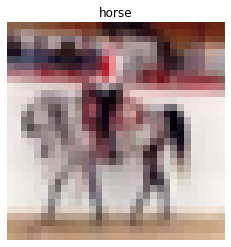

In [ ]:
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [ ]:
def preprocess_img(image, label):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes image to
  [img_shape, img_shape, color_channels]
  """
  # image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)